In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\MOHANKUMAR
                 \Downloads\playground-series-s3e5 (1)\train.csv")
df

,Id,RIGOR MORTIS,LIVOR MORTIS,PALLOR MORTIS,ALGO MORTIS,TIME
0,0,8.0,0.50,0.39,2.20,6
1,1,9.3,0.30,0.73,2.30,6
2,2,7.1,0.51,0.03,2.10,7
3,3,8.1,0.87,0.22,2.60,5
4,4,8.5,0.36,0.30,2.30,6
...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,7
2052,2052,9.7,0.59,0.21,1.80,5
2053,2053,7.7,0.43,0.42,1.70,8
2054,2054,9.1,0.50,0.00,1.75,5


y = df["TIME"]
y

In [7]:
x= df.drop('TIME',axis=1)
x

,Id,RIGOR MORTIS,LIVOR MORTIS,PALLOR MORTIS,ALGO MORTIS
0,0,8.0,0.50,0.39,2.20
1,1,9.3,0.30,0.73,2.30
2,2,7.1,0.51,0.03,2.10
3,3,8.1,0.87,0.22,2.60
4,4,8.5,0.36,0.30,2.30
...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00
2052,2052,9.7,0.59,0.21,1.80
2053,2053,7.7,0.43,0.42,1.70
2054,2054,9.1,0.50,0.00,1.75


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3, random_state = 7 )

In [9]:
x_test

,Id,RIGOR MORTIS,LIVOR MORTIS,PALLOR MORTIS,ALGO MORTIS
76,76,10.9,0.49,0.44,2.6
775,775,7.8,0.60,0.25,2.1
252,252,6.2,0.66,0.02,2.1
522,522,9.0,0.61,0.24,2.5
511,511,10.6,0.50,0.34,4.0
...,...,...,...,...,...
1734,1734,6.9,0.46,0.43,1.8
1189,1189,7.8,0.53,0.06,2.1
1078,1078,6.4,0.63,0.03,2.1
1361,1361,7.0,0.52,0.24,2.2


In [10]:
x_train


,Id,RIGOR MORTIS,LIVOR MORTIS,PALLOR MORTIS,ALGO MORTIS
563,563,11.9,0.685,0.49,2.6
1318,1318,11.5,0.670,0.59,2.8
1433,1433,7.9,0.600,0.26,2.0
1,1,9.3,0.300,0.73,2.3
1382,1382,9.6,0.590,0.31,2.2
...,...,...,...,...,...
1033,1033,6.7,0.270,0.43,1.6
1731,1731,8.3,0.240,0.42,2.1
763,763,6.1,0.590,0.00,1.6
835,835,7.7,0.570,0.06,2.3


In [11]:
y_train


563     6
1318    6
1433    5
1       6
1382    5
       ..
1033    7
1731    7
763     5
835     5
1653    6
Name: TIME, Length: 1644, dtype: int64

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
y_lr_train_pred= lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [15]:
y_lr_train_pred

array([5.57732472, 5.63304791, 5.6559418 , ..., 5.61572576, 5.64992838,
       5.91700183])

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [21]:
lr_results = pd.DataFrame(['linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2])
lr_results

,0
0,linear regression
1,0.698579
2,0.05261
3,0.664036
4,0.031283


In [40]:
df.head()
print(df.shape)

(2056, 6)


[]

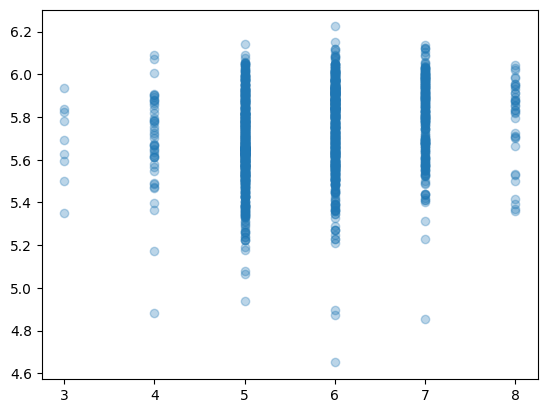

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train,y=y_lr_train_pred,alpha=0.3)
plt.plot()

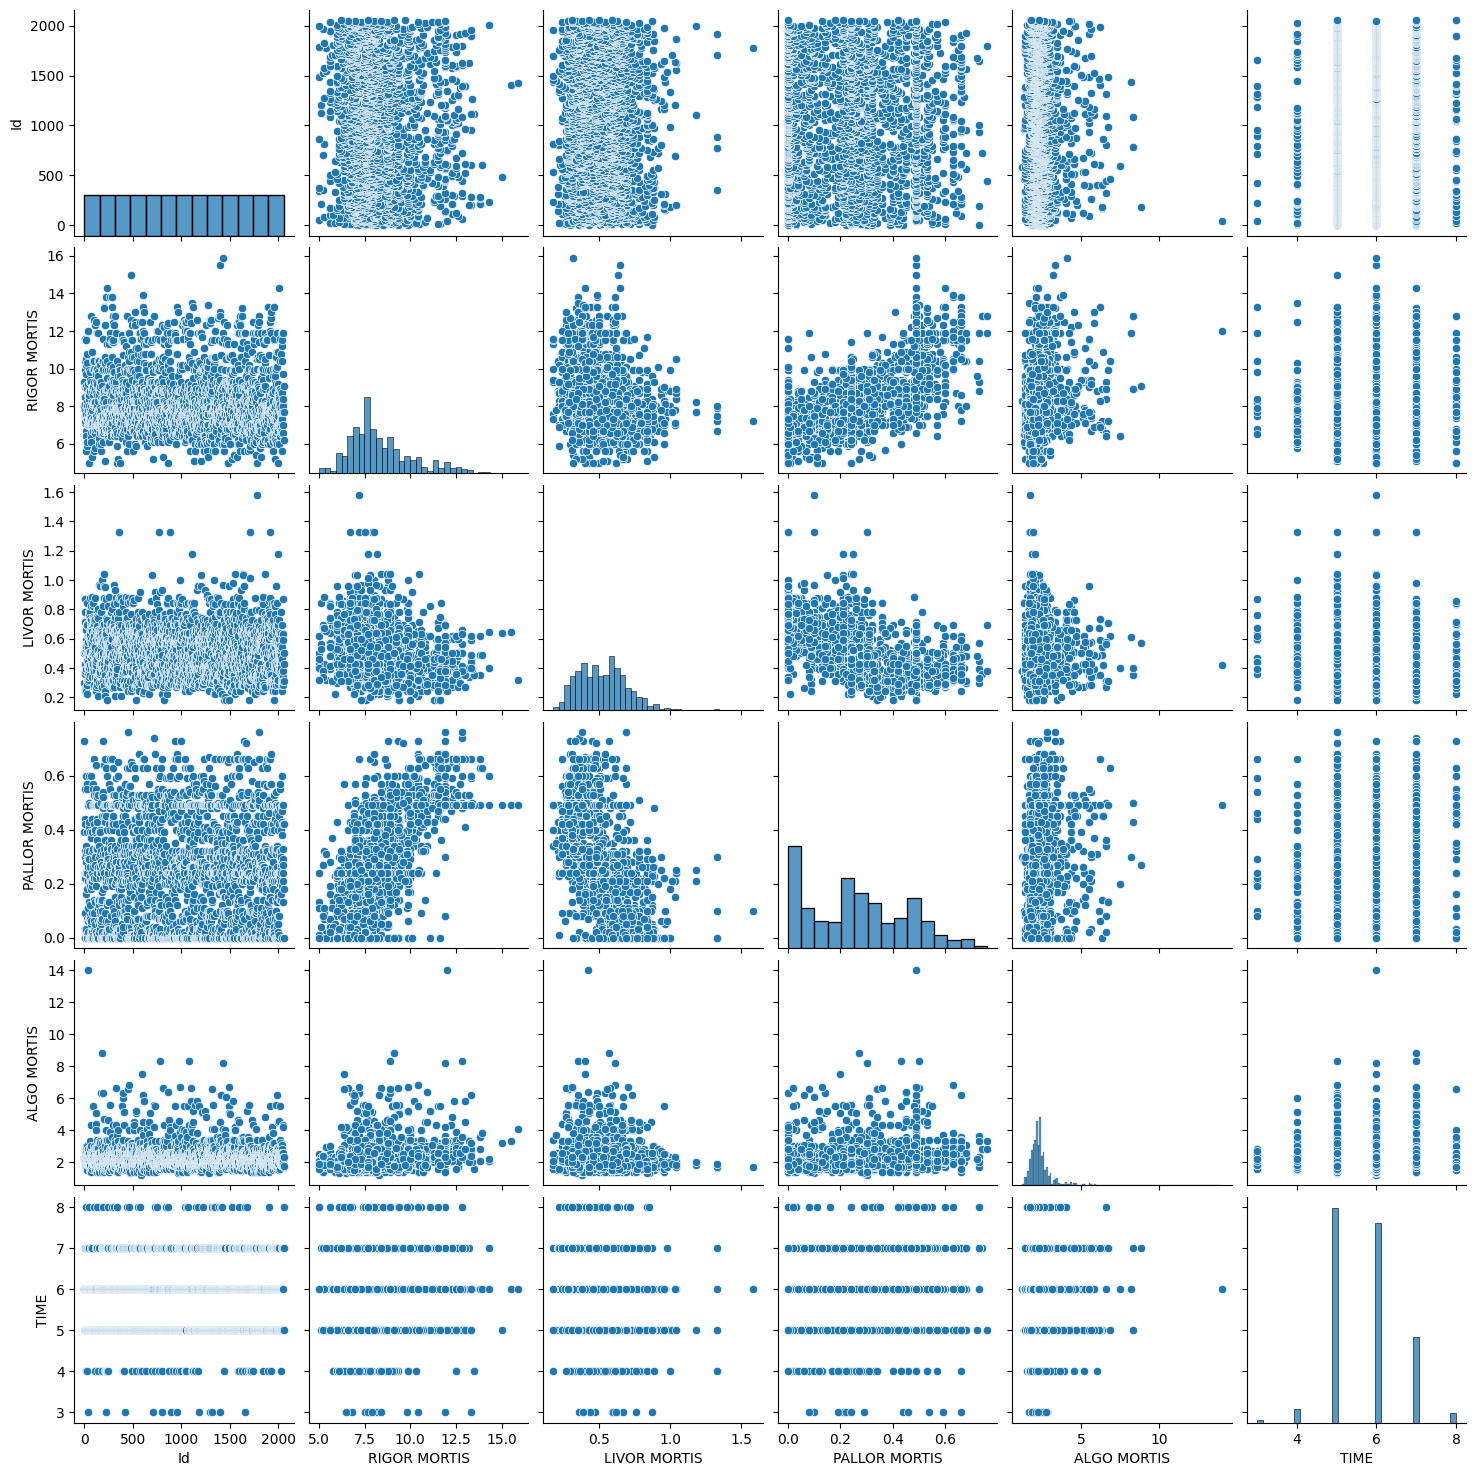

In [27]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

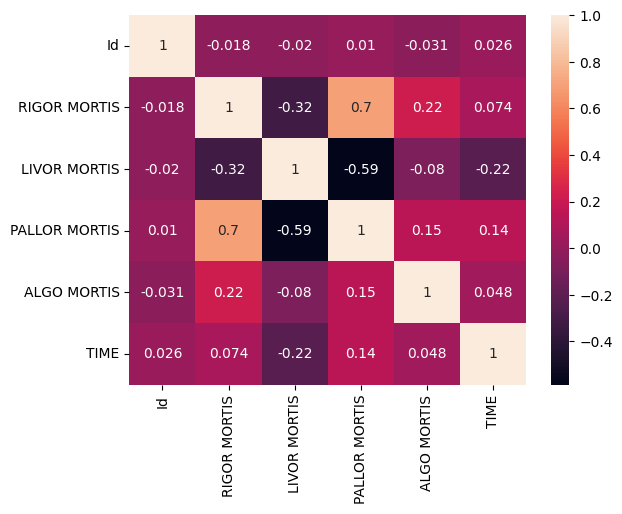

In [60]:
corr = df.corr()
sns.heatmap(corr,annot=True)

<Axes: xlabel='RIGOR MORTIS', ylabel='TIME'>

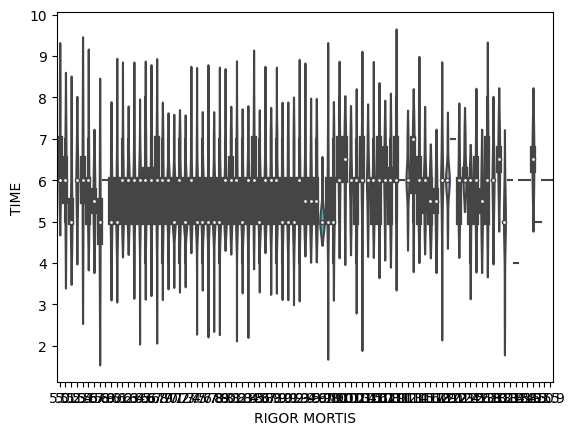

In [42]:
sns.violinplot(x='RIGOR MORTIS', y='TIME', data=df)

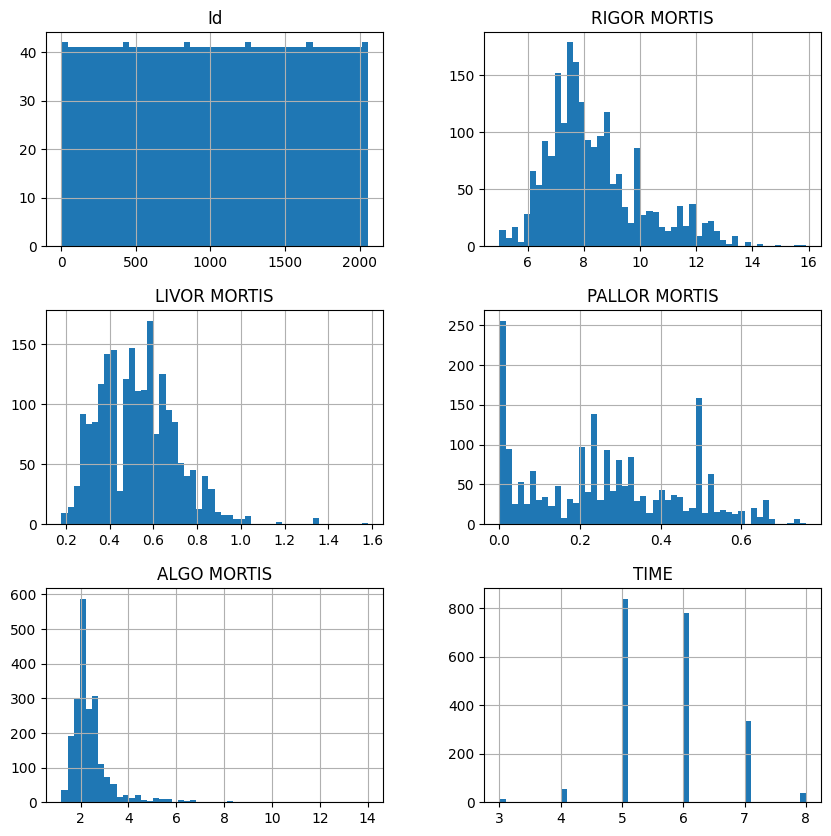

In [29]:
df.hist(figsize=(10,10),bins=50)
plt.show()

C:\Users\MOHANKUMAR\AppData\Local\Temp\ipykernel_26348\79916791.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ALGO MORTIS'])


<Axes: xlabel='ALGO MORTIS', ylabel='Density'>

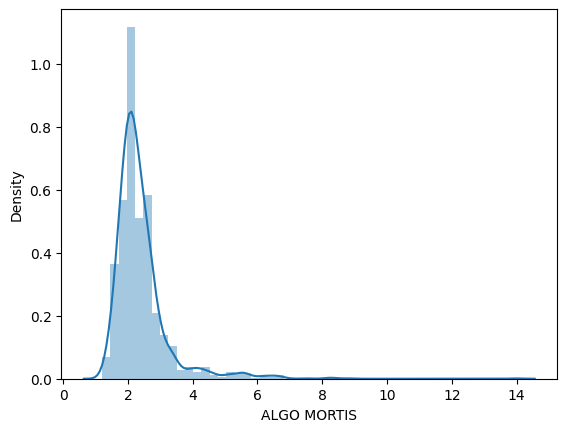

In [33]:
sns.distplot(df['ALGO MORTIS'])

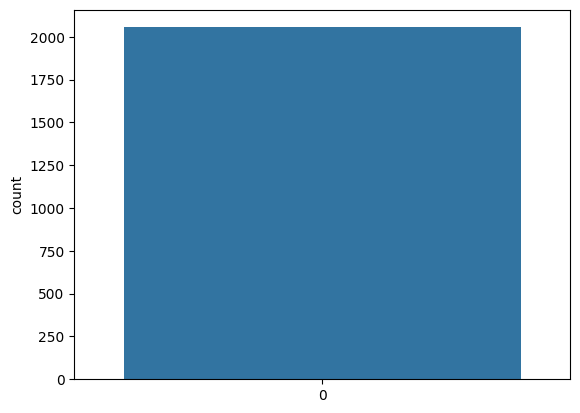

In [34]:
sns.countplot(df['RIGOR MORTIS'])
plt.show()

In [35]:
print(df.isna().sum())

Id               0
RIGOR MORTIS     0
LIVOR MORTIS     0
PALLOR MORTIS    0
ALGO MORTIS      0
TIME             0
dtype: int64


In [36]:
df.corr()

,Id,RIGOR MORTIS,LIVOR MORTIS,PALLOR MORTIS,ALGO MORTIS,TIME
Id,1.000000,-0.017654,-0.020082,0.010262,-0.031383,0.025684
RIGOR MORTIS,-0.017654,1.000000,-0.318436,0.695937,0.216517,0.073852
LIVOR MORTIS,-0.020082,-0.318436,1.000000,-0.585697,-0.080067,-0.219287
PALLOR MORTIS,0.010262,0.695937,-0.585697,1.000000,0.145187,0.141797
ALGO MORTIS,-0.031383,0.216517,-0.080067,0.145187,1.000000,0.048156
TIME,0.025684,0.073852,-0.219287,0.141797,0.048156,1.000000


In [37]:
df.groupby('TIME').mean()

,Id,RIGOR MORTIS,LIVOR MORTIS,PALLOR MORTIS,ALGO MORTIS
TIME,,,,,
3,906.583333,8.850000,0.570000,0.335000,2.241667
4,912.672727,8.080000,0.543182,0.233273,2.377273
5,1023.761621,8.200119,0.574210,0.232026,2.384923
6,1027.557841,8.465296,0.504441,0.281350,2.347365
7,1072.858859,8.582883,0.465511,0.306456,2.569970
8,918.615385,8.312821,0.482051,0.320513,2.344872


In [38]:
df.describe(include='all')

,Id,RIGOR MORTIS,LIVOR MORTIS,PALLOR MORTIS,ALGO MORTIS,TIME
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,8.000000


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.44246353322528365


C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[  0   0   1   1   0   0]
 [  0   0   6   6   0   0]
 [  0   0 166 101   0   0]
 [  0   0 119 107   0   0]
 [  0   0  60  36   0   0]
 [  0   0   6   8   0   0]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.3695299837925446


In [50]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
pred_y = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,pred_y))

Accuracy Score: 0.4181523500810373


In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.3889789303079417


In [57]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.5186385737439222


In [58]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.4651539708265802


In [59]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest'],
    'Score': [0.442,0.369,0.418,0.388,0.518,0.465]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.518,GaussianNB
0.465,Random Forest
0.442,Logistic Regression
0.418,SVC
0.388,Decision Tree
0.369,KNN
